# Telecom Customer Churn Analysis & Prediction
### Model Building & Evaluation Notebook
### Author : Harsh Navin Gupta

## Sections
1. <a href='#import_library'>Importing Libaries</a>
2. <a href='#read_dataset'>Reading Dataset</a>
3. <a href='#data_split'>Split Dataset Into Train And Test</a>
4. <a href='#model_build'>Model Building</a>
    1. <a href='#knn'>KNN Classifier</a>
    2. <a href='#decision_tree'>Decision Tree Classifier</a>
    3. <a href='#random_forest'>Random Forest Classifier</a>
    4. <a href='#naive_bayes'>Naive Bayes Classifier</a>
    5. <a href='#lr'>Logistic Regression</a>
    6. <a href='#sg'>Stochastic Gradient Descent</a>
5. <a href='#model_eval'>Model Evaluation</a>
    1. <a href='#knn_eval'>KNN Classifier Evaluation</a>
    2. <a href='#decision_tree_eval'>Decision Tree Classifier Evaluation</a>
    3. <a href='#random_forest_eval'>Random Forest Classifier Evaluation</a>
    4. <a href='#naive_bayes_eval'>Naive Bayes Classifier Evaluation</a>
    5. <a href='#lr_eval'>Logistic Regression Evaluation</a>
    6. <a href='#sg_eval'>Stochastic Gradient Descent Evaluation</a>
6. <a href='#model_compare'>Model Performance Comparison</a>
7. <a href='#best_model'>Best Model Predictions (Confusion Matrix, Classification Report)</a>

<a id='import_library'></a>

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id='read_dataset'></a>

## Reading Dataset

In [2]:
dataset = pd.read_csv('preprocessed_dataset.csv')

In [3]:
dataset.drop(['Unnamed: 0'], axis=1, inplace=True)
dataset.head()

,tenure,MonthlyCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,StreamingTV_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,2,53.85,1,0,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
1,2,70.70,1,1,0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
2,8,99.65,1,1,0,1,0,1,0,1,...,1,1,0,0,0,1,0,0,1,0
3,28,104.80,1,1,0,1,0,0,1,1,...,1,1,0,0,0,1,0,0,1,0
4,49,103.70,1,0,1,1,0,1,0,1,...,1,1,0,0,0,1,1,0,0,0


<a id='data_split'></a>

## Splitting Dataset Into Train & Test

In [4]:
X = dataset.drop(['Churn'], axis=1)
y = dataset['Churn']

In [5]:
X.head()

,tenure,MonthlyCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingTV_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,2,53.85,0,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
1,2,70.70,1,0,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2,8,99.65,1,0,1,0,1,0,1,0,...,1,1,0,0,0,1,0,0,1,0
3,28,104.80,1,0,1,0,0,1,1,0,...,1,1,0,0,0,1,0,0,1,0
4,49,103.70,0,1,1,0,1,0,1,0,...,1,1,0,0,0,1,1,0,0,0


In [6]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Churn, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=300)

In [8]:
print('Size of X_train : ' + str(X_train.shape))
print('Size of y_train : ' + str(y_train.shape))
print('Size of X_test : ' + str(X_test.shape))
print('Size of y_test : ' + str(y_test.shape))

Size of X_train : (3364, 45)
Size of y_train : (3364,)
Size of X_test : (374, 45)
Size of y_test : (374,)


<a id='model_build'></a>

## Model Building

<a id='knn'></a>

### KNN Model

In [9]:
# Building Model With Neighbors From 1 to 20
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn_scores = []
n_val = []
for i in range(1,21):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    acc_score = cross_val_score(clf, X_train, y_train, scoring='f1', cv=5)
    knn_scores.append(np.mean(acc_score))
    n_val.append(i)

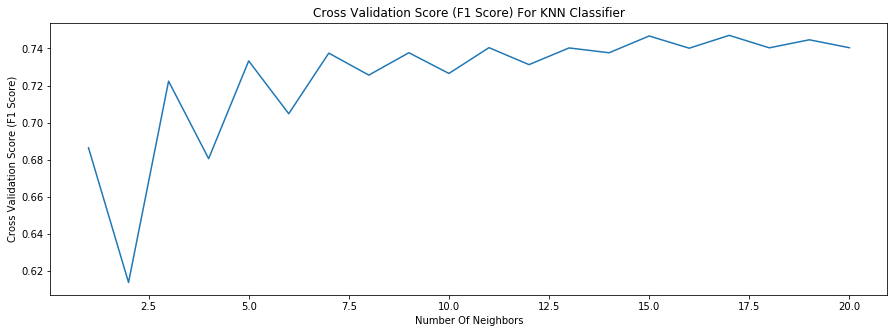

In [10]:
plt.figure(figsize=(15,5))
sns.lineplot(n_val,knn_scores)
plt.title('Cross Validation Score (F1 Score) For KNN Classifier')
plt.xlabel('Number Of Neighbors')
plt.ylabel('Cross Validation Score (F1 Score)')
plt.show()

In [11]:
print('Best F1 Score : ' + str(np.max(knn_scores)))
print('Best Neighbor Value : ' + str(n_val[knn_scores.index(np.max(knn_scores))]))

Best F1 Score : 0.7470464258924354
Best Neighbor Value : 17


In [12]:
# Building Final KNN Model
knn_classifier = KNeighborsClassifier(n_neighbors=n_val[knn_scores.index(np.max(knn_scores))])
knn_classifier.fit(X_train, y_train)
knn_f1_score = np.mean(cross_val_score(knn_classifier, X_train, y_train, scoring='f1', cv=5))

In [13]:
# Saving KNN Model Using Pickle
import pickle
filename = 'KNN_Classifier.model'
with open(filename, 'wb') as file:
    pickle.dump(knn_classifier, file)

<a id='decision_tree'></a>

### Decision Tree Classifier

In [14]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=300,max_depth=6,min_samples_leaf=4)
dt_classifier.fit(X_train, y_train)
dt_f1_score = np.mean(cross_val_score(dt_classifier, X_train, y_train, scoring='f1', cv=5))

In [15]:
print('Decison Tree Classifier F1-Score : ' + str(dt_f1_score))

Decison Tree Classifier F1-Score : 0.7506791465710467


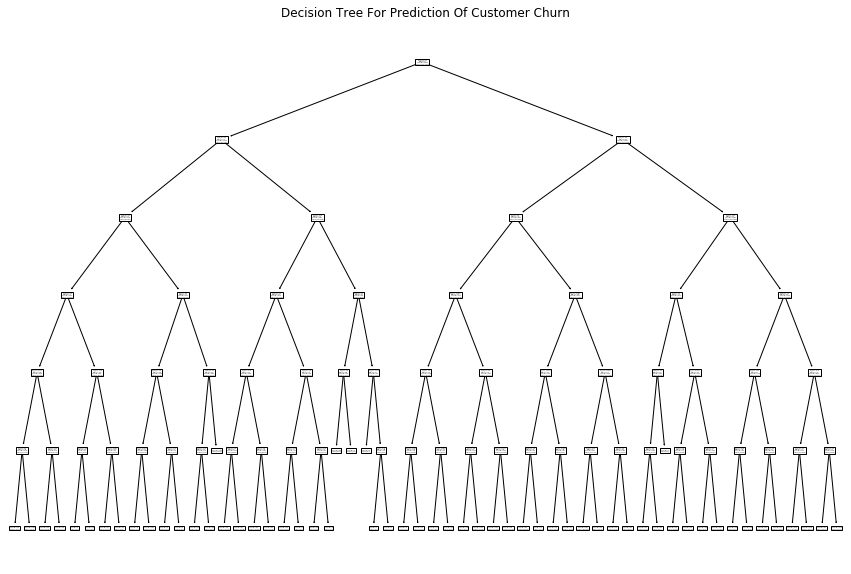

In [16]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
plot_tree(dt_classifier)
plt.title('Decision Tree For Prediction Of Customer Churn')
plt.show()

In [17]:
# Saving Decision Tree Model Using Pickle
import pickle
filename = 'Decison_Tree_Classifier.model'
with open(filename, 'wb') as file:
    pickle.dump(dt_classifier, file)

<a id='random_forest'></a>

### Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=300, n_estimators=700, bootstrap=True)
rf_classifier.fit(X_train, y_train)
rf_f1_score = np.mean(cross_val_score(rf_classifier, X_train, y_train, scoring='f1', cv=5))

In [19]:
print('Random Forest Classifier F1-Score : ' + str(rf_f1_score))

Random Forest Classifier F1-Score : 0.7422719172753055


In [44]:
# Saving Random Forest Model Using Pickle
import pickle
filename = 'Random_Forest_Classifier.model'
with open(filename, 'wb') as file:
    pickle.dump(rf_classifier, file)

<a id='naive_bayes'></a>

### Naive Bayes Classifier

In [20]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_f1_score = np.mean(cross_val_score(nb_classifier, X_train, y_train, scoring='f1', cv=5))

In [21]:
print('Naive Bayes Classifier F1-Score : ' + str(nb_f1_score))

Naive Bayes Classifier F1-Score : 0.7654805963841506


In [22]:
# Saving Naive Bayes Model Using Pickle
import pickle
filename = 'NB_Classifier.model'
with open(filename, 'wb') as file:
    pickle.dump(nb_classifier, file)

<a id='lr'></a>

### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
lg_classifier = LogisticRegression(solver='liblinear')
lg_classifier.fit(X_train, y_train)
lg_f1_score = np.mean(cross_val_score(lg_classifier, X_train, y_train, scoring='f1', cv=5))

In [24]:
print('Logistic Regression F1-Score : ' + str(lg_f1_score))

Logistic Regression F1-Score : 0.7697852698689018


In [25]:
# Saving Logistic Regression Model Using Pickle
import pickle
filename = 'LGR_Classifier.model'
with open(filename, 'wb') as file:
    pickle.dump(lg_classifier, file)

<a id='sg'></a>

### Stochastic Gradient Descent

In [30]:
from sklearn.linear_model import SGDClassifier
sg_classifier = SGDClassifier(loss='modified_huber', shuffle=True, random_state=300)
sg_classifier.fit(X_train, y_train)
sg_f1_score = np.mean(cross_val_score(sg_classifier, X_train, y_train, scoring='f1',cv=5))

In [31]:
print('Stochastic Gradient Descent F1-Score : ' + str(sg_f1_score))

Stochastic Gradient Descent F1-Score : 0.6970808041375712


In [32]:
# Saving Stochastic Gradient Descent Model Using Pickle
import pickle
filename = 'Stochastic_Gradient_Descent.model'
with open(filename, 'wb') as file:
    pickle.dump(sg_classifier, file)

<a id='model_eval'></a>

## Model Evaluation

In [33]:
model_eval_df = pd.DataFrame(columns=['Model','Train F1 Score','Test F1 Score','Test Accuracy'])
df_index = 0

<a id='knn_eval'></a>

### KNN Model Evaluation

In [34]:
predictions = knn_classifier.predict(X_test)
# Caculating F1 Score
from sklearn.metrics import f1_score, accuracy_score
knn_test_f1_score = f1_score(y_test, predictions)
knn_test_acc_score = accuracy_score(y_test, predictions)

# Adding Scores To DataFrame
model_eval_df.loc[df_index] = ['KNN', knn_f1_score, knn_test_f1_score, knn_test_acc_score]
df_index = df_index + 1

<a id='decision_tree_eval'></a>

### Decision Tree Evaluation

In [35]:
predictions = dt_classifier.predict(X_test)
# Caculating F1 Score
from sklearn.metrics import f1_score, accuracy_score
dt_test_f1_score = f1_score(y_test, predictions)
dt_test_acc_score = accuracy_score(y_test, predictions)

# Adding Scores To DataFrame
model_eval_df.loc[df_index] = ['Decision Tree', dt_f1_score, dt_test_f1_score, dt_test_acc_score]
df_index = df_index + 1

<a id='random_forest_eval'></a>

### Random Forest Evaluation

In [36]:
predictions = rf_classifier.predict(X_test)
# Caculating F1 Score
from sklearn.metrics import f1_score, accuracy_score
rf_test_f1_score = f1_score(y_test, predictions)
rf_test_acc_score = accuracy_score(y_test, predictions)

# Adding Scores To DataFrame
model_eval_df.loc[df_index] = ['Random Forest', rf_f1_score, rf_test_f1_score, rf_test_acc_score]
df_index = df_index + 1

<a id='naive_bayes_eval'></a>

### Naive Bayes Model Evaluation

In [37]:
predictions = nb_classifier.predict(X_test)
# Caculating F1 Score
from sklearn.metrics import f1_score, accuracy_score
nb_test_f1_score = f1_score(y_test, predictions)
nb_test_acc_score = accuracy_score(y_test, predictions)

# Adding Scores To DataFrame
model_eval_df.loc[df_index] = ['Naive Bayes Classifier', nb_f1_score, nb_test_f1_score, nb_test_acc_score]
df_index = df_index + 1

<a id='lr_eval'></a>

### Logistic Regression Evaluation

In [38]:
predictions = lg_classifier.predict(X_test)
# Caculating F1 Score
from sklearn.metrics import f1_score, accuracy_score
lg_test_f1_score = f1_score(y_test, predictions)
lg_test_acc_score = accuracy_score(y_test, predictions)

# Adding Scores To DataFrame
model_eval_df.loc[df_index] = ['Logistic Regression', lg_f1_score, lg_test_f1_score, lg_test_acc_score]
df_index = df_index + 1

<a id='sg_eval'></a>

### Stochastic Gradient Descent Evaluation

In [39]:
predictions = sg_classifier.predict(X_test)
# Caculating F1 Score
from sklearn.metrics import f1_score, accuracy_score
sg_test_f1_score = f1_score(y_test, predictions)
sg_test_acc_score = accuracy_score(y_test, predictions)

# Adding Scores To DataFrame
model_eval_df.loc[df_index] = ['Stochastic Gradient Descent', sg_f1_score, sg_test_f1_score, sg_test_acc_score]
df_index = df_index + 1

<a id='model_compare'></a>

## Model Performance Comparison

In [40]:
model_eval_df

,Model,Train F1 Score,Test F1 Score,Test Accuracy
0,KNN,0.747046,0.708333,0.700535
1,Decision Tree,0.750679,0.719388,0.705882
2,Random Forest,0.742272,0.708010,0.697861
3,Naive Bayes Classifier,0.765481,0.749403,0.719251
4,Logistic Regression,0.769785,0.748691,0.743316
5,Stochastic Gradient Descent,0.697081,0.741053,0.671123


The best performing model is **Logistic Regression**. Although **Naive Bayes Classifier** has a higher F1 Score in the test set, the **Logistic Regression** has a **HIGHER ACCURACY**.

<a id='best_model'></a>

## Best Model Predictions

In [41]:
# Predicting Using Logistic Regression Classifier
predictions = lg_classifier.predict(X_test)

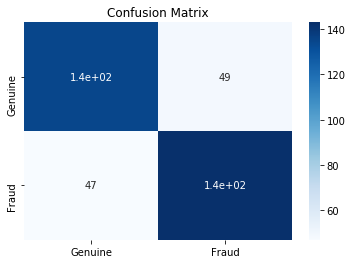

In [42]:
# Visualising Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
df_cm = pd.DataFrame(cm, index=['Genuine','Fraud'], columns=['Genuine','Fraud'])
sns.heatmap(df_cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [43]:
# Printing Classification Report
from sklearn.metrics import classification_report
print('Classification Report')
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.74      0.73      0.74       184
           1       0.74      0.75      0.75       190

    accuracy                           0.74       374
   macro avg       0.74      0.74      0.74       374
weighted avg       0.74      0.74      0.74       374



## ----END----